In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# WHY ARE WE DOING THIS!!!!
# Talk a lot about background information
# Research question: why should i care?
# How to approach the question at what data?
# MORE DATAAAA
# Interpretation of the result
# Implications
# Variables: nutrition
# More background data
# Two dataframes
# Linear/naive bayes/decision tree (3 MODELS)
#dependent to continuous
# nutrition rate: 1-100
# classifier: 1-50(low), 51-100 (high)
# PCA >> Single DV >> Starting
# dimension reduction (multiple reduced into single variable)
# Nutrition ~ BMI + Height + FriedFood_Consumption




# Problem: Analyzing Factors Influencing Nutritional Habits in Adolescents
# Models to be possibly used: Logistic Regression (to analyze the most important factors influencing nutritional habits, use coefficients), Naive Bayes,
# Independent Variable (Y): Probability of obesity based on habits utilizing PCA as a predictor variable

In [ ]:
# LINKS GO HERE
# https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health
# https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset
# https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data
# https://catalog.data.gov/dataset/normal-weight-overweight-and-obesity-among-adults-aged-20-and-over-by-selected-characteris-8e2b1

In [ ]:
# DATAFRAMES GO HERE
#'gdrive/My Drive/Advertising.csv'
#df_basev1 = pd.read_csv('/content/smmh.csv')
df_basev2 = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
#df_basev3 = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
#df_basev4 = pd.read_csv('/content/Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv')

#df1 = df_basev1
df2 = df_basev2
#df3 = df_basev3
#df4 = df_basev4

In [ ]:
# Filter for only United States
df2 = df2[df2['Country'] == 'United States']

In [ ]:
# Drop columns, clean naans
df2.dropna()
df2['Sex'] = df2['Sex'].replace({'Female': 0, 'Male': 1})
df2['Diet'] = df2['Diet'].replace({'Unhealthy': 0, 'Average': 0.5, 'Healthy': 1})
df2.drop(columns = ['Hemisphere', 'Blood Pressure', 'Continent', 'Patient ID', 'Country'])
# Binary Values: Sex, Diabetes, Family History(Heart Attack), Smoking, Obesity, Alcohol Consumption, Previous Heart Problem, Medication, Heart Attack Risk
# Quantitative Values: Age, Heart Rate, Cholestrol, Exercise (Hour), Stress Level, Sedentary (Hours), Income(Rupees), BMI, Triglycerides, Physical Activity (Days Per Week), Diet, Sleep Hours

<ipython-input-12-702550e8c314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sex'] = df2['Sex'].replace({'Female': 0, 'Male': 1})
<ipython-input-12-702550e8c314>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Diet'] = df2['Diet'].replace({'Unhealthy': 0, 'Average': 0.5, 'Healthy': 1})


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
11,71,1,374,70,1,1,1,1,1,8.251995,...,0,0,4,7.227338,163066,32.485345,523,4,8,0
18,50,0,303,104,1,0,1,0,1,4.943580,...,1,1,1,7.586984,21501,25.964351,517,1,5,1
43,44,1,121,51,1,0,1,1,1,16.658973,...,0,0,7,5.258915,59122,27.094191,158,4,10,1
54,31,1,243,92,1,1,1,1,1,2.403627,...,0,1,2,7.247167,269959,30.990299,410,7,9,0
152,82,1,396,60,0,1,1,0,1,19.297266,...,1,1,5,5.401895,265224,23.659172,471,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8682,38,1,393,75,1,0,1,1,1,2.187330,...,0,1,6,1.604016,148481,35.322423,583,1,8,0
8694,43,0,384,63,1,0,1,1,1,8.989279,...,1,1,9,6.103019,77888,37.975516,344,3,5,1
8720,31,1,322,59,1,1,1,0,1,4.055802,...,1,0,1,1.746641,25317,37.328868,731,3,10,0
8727,52,0,286,49,0,0,1,1,1,15.425910,...,0,0,4,11.668110,89730,28.440778,314,7,5,0


In [ ]:
#df2
print(df2.columns)

In [ ]:
# Model 1: Logistic Regression
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
Y = df2['Diet']
X = df2.drop(columns=['Diet'])

In [ ]:
# Splitting the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=42)

# regularization is used here to prevent overfitting, and to discount larger coefficients, more weight given to normal coeffs
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
#logit_reg = LogisticRegression(penalty="l1", C=1e42, solver='liblinear')
#there were no overbearing coefficients present so we did not include the previous penalties
#logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(X_train, Y_train)

Y_valid_predicted = logit_reg.predict(X_valid) # predicting Y on the validation set
Y_valid_pred_prob = logit_reg.predict_proba(X_valid) # get the predicted probabilties for each class

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
Y = df2['Diet']

logit_sm = sm.Logit(Y, X)
results = logit_sm.fit()
results.summary()

In [ ]:
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(Y_valid, Y_valid_predicted)
print('Logistic Regression')
print("Validation Set Classification accuracy:", logit_reg.score(X_valid,Y_valid))
print("\n")
print ("Validation Set Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Validation Set Classification Report:\n",classification_report(Y_valid, Y_valid_predicted))


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
viz = RocCurveDisplay.from_estimator(logit_reg, X_valid, Y_valid)

print('Area under the ROC:', viz.roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show();

In [ ]:
# Model 2: Naive Bayes >>
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
df_basev2 = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
df2 = df_basev2.copy()

df2 = df2[df2['Country'] == 'United States']
df2.dropna(inplace=True)
df2['Sex'] = df2['Sex'].replace({'Female': 0, 'Male': 1})
df2['Diet'] = df2['Diet'].replace({'Unhealthy': 0, 'Average': 0.5, 'Healthy': 1})
df2.drop(columns=['Hemisphere', 'Blood Pressure', 'Continent', 'Patient ID', 'Country'], inplace=True)


X = df2[['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
        'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
        'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day']]
y = df2['Heart Attack Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Naive Bayes model
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.4523809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.46      0.52        54
           1       0.31      0.43      0.36        30

    accuracy                           0.45        84
   macro avg       0.45      0.45      0.44        84
weighted avg       0.49      0.45      0.46        84



In [ ]:
print(X.describe())

              Age         Sex  Cholesterol  Heart Rate    Diabetes  \
count  420.000000  420.000000   420.000000  420.000000  420.000000   
mean    55.257143    0.716667   268.852381   74.426190    0.666667   
std     20.643596    0.451154    80.742717   20.456993    0.471967   
min     18.000000    0.000000   121.000000   40.000000    0.000000   
25%     37.000000    0.000000   199.000000   56.000000    0.000000   
50%     55.000000    1.000000   273.000000   74.000000    1.000000   
75%     71.250000    1.000000   338.250000   92.000000    1.000000   
max     90.000000    1.000000   400.000000  110.000000    1.000000   

       Family History     Smoking     Obesity  Alcohol Consumption  \
count      420.000000  420.000000  420.000000           420.000000   
mean         0.554762    0.904762    0.502381             0.638095   
std          0.497585    0.293894    0.500591             0.481125   
min          0.000000    0.000000    0.000000             0.000000   
25%          0.0000

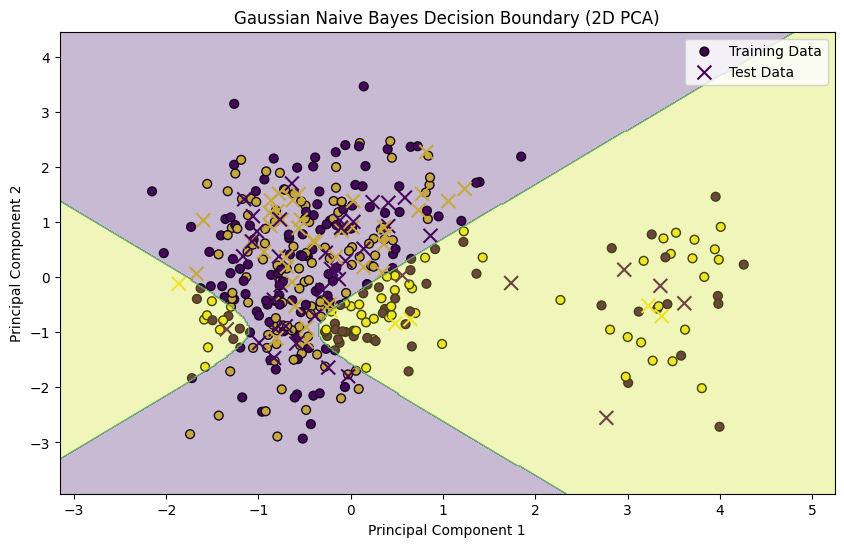

In [ ]:
# Model 2: Naive Bayes Plot>>
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df2 contains your dataset with features and the target variable 'Obesity'
# You may need to adjust the column names and preprocessing steps based on your actual data

# Drop rows with missing values
df2.dropna(inplace=True)

# Separate features and target variable
X = df2.drop('Obesity', axis=1)
y = df2['Obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Gaussian Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Gaussian Naive Bayes model
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_pca, y_train)

# Plot decision regions
plt.figure(figsize=(10, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40, label='Training Data')

# Plot test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Test Data')

# Create a meshgrid to plot decision boundaries
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = naive_bayes_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

plt.title('Gaussian Naive Bayes Decision Boundary (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Accuracy: 0.47619047619047616
Confusion Matrix:
 [[29 11]
 [33 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.72      0.57        40
           1       0.50      0.25      0.33        44

    accuracy                           0.48        84
   macro avg       0.48      0.49      0.45        84
weighted avg       0.48      0.48      0.45        84



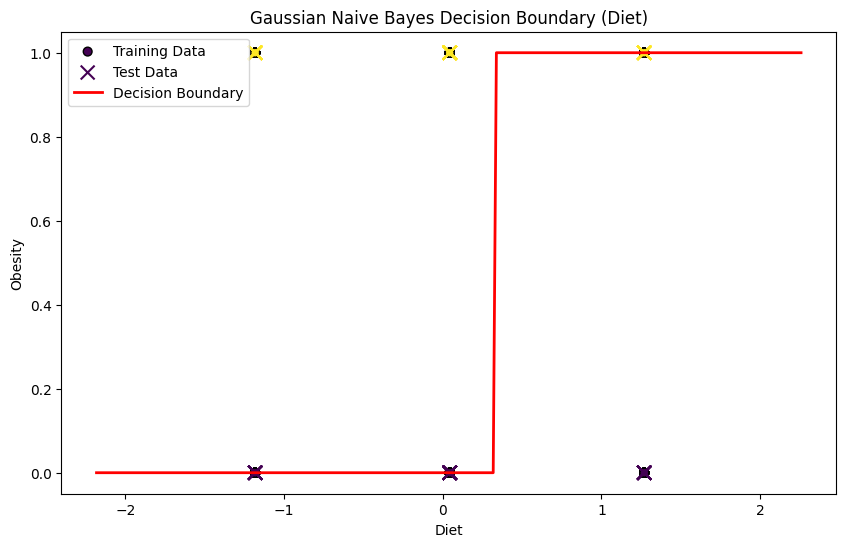

In [ ]:
#Naive Bayes Diet as Predictor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df2 contains your dataset with features and the target variable 'Obesity'
# You may need to adjust the column names and preprocessing steps based on your actual data

# Drop rows with missing values
df2.dropna(inplace=True)

# Separate features and target variable
X = df2[['Diet']]  # Using 'Diet' as the predictor variable
y = df2['Obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Gaussian Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes model
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_scaled)
y_prob = naive_bayes_classifier.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (obese)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot decision regions
plt.figure(figsize=(10, 6))

# Plot training points
plt.scatter(X_train_scaled, y_train, c=y_train, cmap='viridis', edgecolor='k', s=40, label='Training Data')

# Plot test points
plt.scatter(X_test_scaled, y_test, c=y_test, cmap='viridis', marker='x', s=100, label='Test Data')

# Create a meshgrid to plot decision boundaries
h = .02
x_min, x_max = X_train_scaled.min() - 1, X_train_scaled.max() + 1
xx = np.arange(x_min, x_max, h).reshape(-1, 1)

# Plot decision boundaries
Z = naive_bayes_classifier.predict(xx)
plt.plot(xx, Z, color='red', lw=2, label='Decision Boundary')

plt.title('Gaussian Naive Bayes Decision Boundary (Diet)')
plt.xlabel('Diet')
plt.ylabel('Obesity')
plt.legend()
plt.show()


In [ ]:
# Model 3: KNN, confirmation rate to see if people ACTUALLY suffer from obesity or
# heart attack with a Confusion matrix to decide whether people have obesity/heart attack or not based on TP/FP >>
# understanding heart attacks/obesity dataframes >> use df2, etc

In [ ]:
# LETS USE DF2